**Load necessary modules**

In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate as sr
import matplotlib.pyplot as plt
import pandas as pd

**A huge dataset:** In the following few cells we analyze a huge dataset that contains the following experiment. We create a uniform 30x30 grid of (w,b) values and for each we value sample 100 realizations of $W_{\rm in}$ and $b_{\rm in}$ and find the corresponding $W$. In the cell below we figure out which initializations produced good forecasts and which ones did not. In total we have 90000 realizations to analyze which took a loooooong time to upload on Github!

**Run this cell once to prepare data**

In [2]:
bra = sr.BatchRunAnalyzer_SMLR(save_folder='../data/L63-SMLR-1')
L63_data_folder = '../data/L63-trajectories'
u = np.load('{}/validation.npy'.format(L63_data_folder))
limits_in, limits = [-0.1, 0.1], [-.5, .5]
# bra.count(u[:, :1].flatten(), 1, limits_in, limits, threshold=0.98);
rmse_threshold = np.sqrt(5e-2)
bra.compute_error(u[:, :500], rmse_threshold)

Time taken by compute_error is 329.33635807037354 seconds


**Extract data and assign colors according to good or bad forecast capabilities**

In [6]:
bra = sr.BatchRunAnalyzer_SMLR(save_folder='../data/L63-SMLR-1')
s, tau_f_limits = 1000, np.array([3., 6.])

# Random indices for data selection
random_l = np.random.choice(bra.sqrt_n_models**2*bra.n_repeats, size=s, replace=False)
random_k = random_l % bra.sqrt_n_models
random_j = np.array(list(map(int, ((random_l - random_k) % bra.sqrt_n_models**2) / bra.sqrt_n_models)))
random_i =  np.array(list(map(int, (random_l - random_k - random_j*bra.sqrt_n_models) / bra.sqrt_n_models**2)))


# # Initialization of variables to compare
tau_f = np.zeros(s)
colors = []
zero_cols_W = np.zeros_like(tau_f)
zero_rows_W_in = np.zeros_like(tau_f)
bad_phi = np.zeros_like(tau_f)


# # Color picker
def color_picker(tau_f): 
    if tau_f < tau_f_limits[0]:
        return 'red'
    elif tau_f > tau_f_limits[1]:
        return 'green'
    else:
        return 'darkgrey' 

# # Load data
data = bra.get_data()
for m, l in enumerate(random_l):
    i, j, k = random_i[m], random_j[m], random_k[m]
    tau_f[m] = data.loc[l, 'tau_f_rmse']
    colors.append(color_picker(tau_f[m]))
    zero_cols_W[m] = data.loc[l, '0-cols-W']
    zero_rows_W_in[m] = data.loc[l, '0-rows-W_in']
    bad_phi[m] = data.loc[l, 'bad_features']

**Relationships with $\tau_f$:  Red $\implies$ Bad forecasts, Grey $\implies$ Mediocre forecasts, Green $\implies$ Good forecasts**

Text(0.5, 0, '# zero rows in $W_{\\rm in}$')

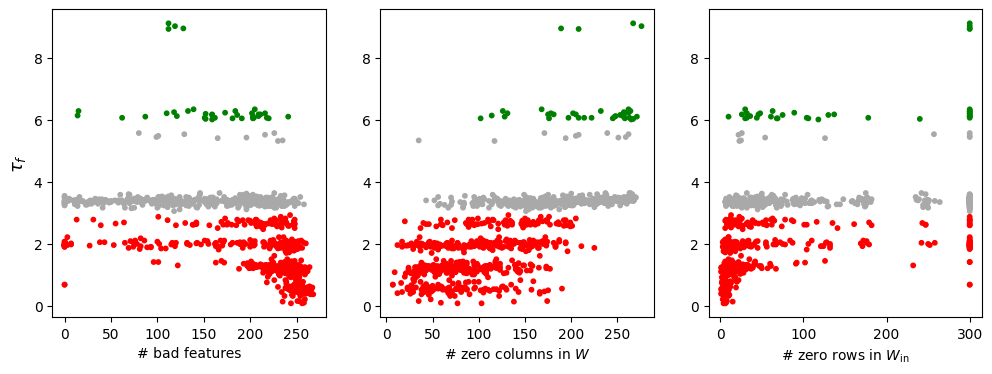

In [7]:
s = 10
fig = plt.figure(figsize=(12, 4))
ax_b = fig.add_subplot(131)
ax_c = fig.add_subplot(132)
ax_r = fig.add_subplot(133)

ax_b.scatter(bad_phi, tau_f, c=colors, s=s)
ax_b.set_ylabel(r'$\tau_f$', fontsize=13)
ax_b.set_xlabel(r'# bad features')

ax_c.scatter(zero_cols_W, tau_f, c=colors, s=s)
ax_c.set_xlabel(r'# zero columns in $W$')

ax_r.scatter(zero_rows_W_in, tau_f, c=colors, s=s)
ax_r.set_xlabel(r'# zero rows in $W_{\rm in}$')

**Relationships with bad features**

Text(0.5, 0, '# zero rows in $W_{\\rm in}$')

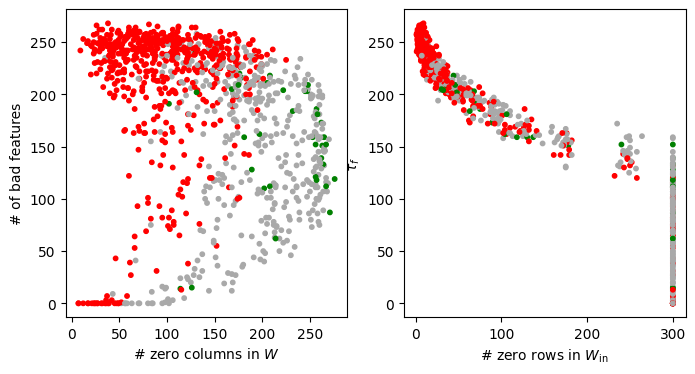

In [8]:
s = 10
fig = plt.figure(figsize=(8, 4))
ax_c = fig.add_subplot(121)
ax_r = fig.add_subplot(122)


ax_c.scatter(zero_cols_W, bad_phi, c=colors, s=s)
ax_c.set_ylabel(r'# of bad features', fontsize=10)
ax_c.set_xlabel(r'# zero columns in $W$')

ax_r.scatter(zero_rows_W_in, bad_phi, c=colors, s=s)
ax_r.set_ylabel(r'$\tau_f$')
ax_r.set_xlabel(r'# zero rows in $W_{\rm in}$')

**Relationships between zero row of $W_{\rm in}$ and zero columns of $W$**

Text(0.5, 0, '# zero columns in $W$')

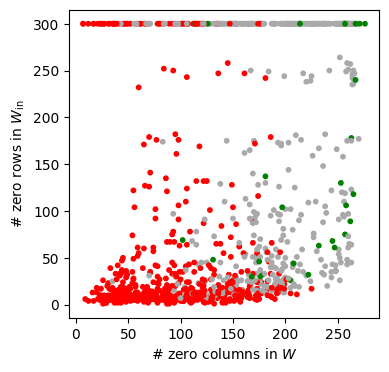

In [9]:
s = 10
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)

ax.scatter(zero_cols_W, zero_rows_W_in, c=colors, s=s)
ax.set_ylabel(r'# zero rows in $W_{\rm in}$', fontsize=10)
ax.set_xlabel(r'# zero columns in $W$')

In [4]:
a = np.random.normal(size=(3, 10))
b = np.random.normal(size=(3, 10))
e = b - a

In [11]:
np.cumsum(np.linalg.norm(e))

array([7.4862771])

In [63]:
np.abs(a) > 0.5

array([False, False,  True, False, False, False,  True,  True, False,
       False])

In [64]:
np.argmax(np.abs(a) > 0.5)

2

In [13]:
np.sqrt(0.05)

0.22360679774997896

In [12]:
a.mean()

-0.037088585319074927

NameError: name 'sr1' is not defined